# Загрузка данных и основные характеристики датасета 

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


In [187]:

data=pd.read_csv("googleplaystore.csv")


In [188]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [189]:
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [190]:
data.shape

(10841, 13)

In [191]:
data.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

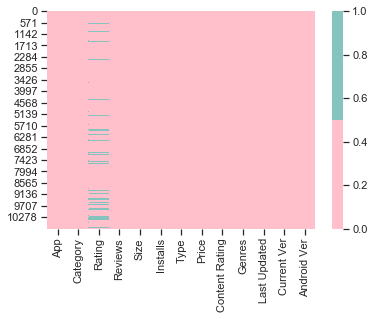

In [192]:
cols = data.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#ffc0cb', '#84c3be'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

created missing indicator for: Rating
created missing indicator for: Type
created missing indicator for: Content Rating
created missing indicator for: Current Ver
created missing indicator for: Android Ver


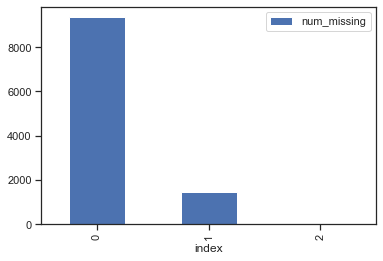

In [193]:
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [167]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

App - 0.0%
Category - 0.0%
Rating - 14.0%
Reviews - 0.0%
Size - 0.0%
Installs - 0.0%
Type - 0.0%
Price - 0.0%
Content Rating - 0.0%
Genres - 0.0%
Last Updated - 0.0%
Current Ver - 0.0%
Android Ver - 0.0%


In [195]:
med = data['Rating'].median()
print(med)
data['Rating'] = data['Rating'].fillna(med)

4.3


In [196]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

App - 0.0%
Category - 0.0%
Rating - 0.0%
Reviews - 0.0%
Size - 0.0%
Installs - 0.0%
Type - 0.0%
Price - 0.0%
Content Rating - 0.0%
Genres - 0.0%
Last Updated - 0.0%
Current Ver - 0.0%
Android Ver - 0.0%
Rating_ismissing - 0.0%
Type_ismissing - 0.0%
Content Rating_ismissing - 0.0%
Current Ver_ismissing - 0.0%
Android Ver_ismissing - 0.0%
num_missing - 0.0%


In [199]:
data['Reviews'] = data['Reviews'].apply(pd.to_numeric, errors='coerce')

In [200]:
data.corr()

,Rating,Reviews,Rating_ismissing,Type_ismissing,Content Rating_ismissing,Current Ver_ismissing,Android Ver_ismissing,num_missing
Rating,1.000000,0.063166,0.072990,0.001767,0.283656,-0.006529,0.169146,0.087941
Reviews,0.063166,1.000000,-0.060183,-0.001457,NaN,-0.004095,-0.002060,-0.060206
Rating_ismissing,0.072990,-0.060183,1.000000,0.024212,-0.003810,0.028862,-0.006600,0.994201
Type_ismissing,0.001767,-0.001457,0.024212,1.000000,-0.000092,-0.000261,-0.000160,0.051767
Content Rating_ismissing,0.283656,NaN,-0.003810,-0.000092,1.000000,-0.000261,0.577297,0.051767
Current Ver_ismissing,-0.006529,-0.004095,0.028862,-0.000261,-0.000261,1.000000,-0.000452,0.107154
Android Ver_ismissing,0.169146,-0.002060,-0.006600,-0.000160,0.577297,-0.000452,1.000000,0.057580
num_missing,0.087941,-0.060206,0.994201,0.051767,0.051767,0.107154,0.057580,1.000000


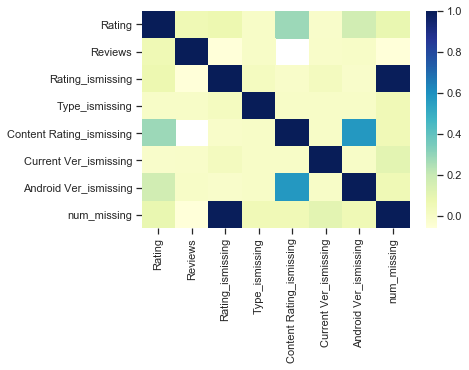

In [201]:
sns.heatmap(data.corr(), cmap='YlGnBu', fmt='.3f')

In [207]:
data['Price'] = data['Price'].apply(pd.to_numeric, errors='coerce')

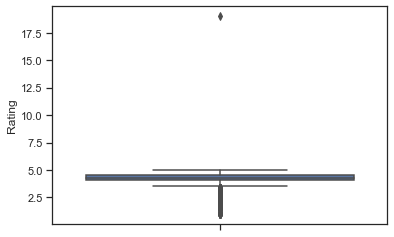

In [209]:
sns.boxplot(y=data['Rating'])

In [173]:
from sklearn import preprocessing

In [174]:
le =  preprocessing.LabelEncoder()

In [175]:
le.fit(data.Reviews)
LabelEncoder()

LabelEncoder()

In [176]:
list( le.classes_)

['0',
 '1',
 '10',
 '100',
 '1000417',
 '10006',
 '100082',
 '100130',
 '100179',
 '1002',
 '1002859',
 '1002861',
 '1003269',
 '10035',
 '100406',
 '1004709',
 '10053186',
 '10054',
 '10055521',
 '1006',
 '100609',
 '10067',
 '1007',
 '1008',
 '1008012',
 '100805',
 '10088',
 '10093',
 '10097',
 '100994',
 '100997',
 '101',
 '1010',
 '1011',
 '10114',
 '101163',
 '10117',
 '1012',
 '1013',
 '1013465',
 '1013635',
 '1013867',
 '1013944',
 '101455',
 '1014822',
 '1014846',
 '1015',
 '10158',
 '10159',
 '1016',
 '101686',
 '1017237',
 '101738',
 '1017408',
 '101762',
 '1018',
 '101883',
 '1019',
 '101957',
 '10198',
 '102',
 '102107',
 '10212',
 '10214862',
 '10216538',
 '10216997',
 '10218',
 '1022',
 '102215',
 '102248',
 '10225',
 '1024',
 '102451',
 '10247',
 '10249',
 '1025',
 '10253',
 '10256',
 '102594',
 '1026',
 '10270',
 '102858',
 '1028637',
 '1028794',
 '10291',
 '102923',
 '10295',
 '103',
 '10306',
 '103064',
 '103074',
 '103078',
 '1031',
 '1031045',
 '10318',
 '103199',
 

In [177]:
data['Price'] = data['Price'].apply(pd.to_numeric, errors='coerce')

In [178]:
data['Installs'] = data['Installs'].apply(pd.to_numeric, errors='coerce')

In [179]:
data['Reviews'] = data['Reviews'].apply(pd.to_numeric, errors='coerce')

In [180]:
data['Size'] = data['Size'].apply(pd.to_numeric, errors='coerce')

In [181]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [182]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,NaN,NaN,NaN
Reviews,0.063166,1.000000,NaN,NaN,NaN
Size,NaN,NaN,NaN,NaN,NaN
Installs,NaN,NaN,NaN,NaN,NaN
Price,NaN,NaN,NaN,NaN,NaN
